## Засоби підготовки та аналізу даних
#### Шафранський Даніїл, ФБ-22. Лабораторна робота №4

##### Перший рівень

Imports

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import timeit as ti
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Download dataset and create .csv file

In [ ]:
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 

X = individual_household_electric_power_consumption.data.features 

X_df = pd.DataFrame(X)

X_df.to_csv('individual_household_electric_power_consumption.csv', index=False)

print(X_df)

Load dataset into variables, drop missing values and convert string data into numeric

In [ ]:
data_df = pd.read_csv('individual_household_electric_power_consumption.csv')

data_df = data_df.dropna()
data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])

for column in data_df.columns[2:-1]:
    data_df[column] = pd.to_numeric(data_df[column], errors = 'coerce')

data_np = data_df.to_numpy()
print(data_df)

C:\Users\safra\AppData\Local\Temp\ipykernel_1368\703508129.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('individual_household_electric_power_consumption.csv')
C:\Users\safra\AppData\Local\Temp\ipykernel_1368\703508129.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])


               Date      Time  Global_active_power  Global_reactive_power   
0        16/12/2006  17:24:00                4.216                  0.418  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2   
0    

1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [ ]:
def task1_np(data):
    return data[data[:, 2] > 5]

def task1_df(data):
    return data[data['Global_active_power'] > 5]

print('Numpy array:\n', task1_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task1_np(data_np), number=1))
print('DataFrame:\n', task1_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task1_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '17:25:00' 5.36 ... '0.000' '1.000' 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... '0.000' '2.000' 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... '0.000' '1.000' 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]
Execution time with numpy array: 0.05305929997120984
DataFrame:
                Date      Time  Global_active_power Global_reactive_power   
1        16/12/2006  17:25:00                5.360                 0.436  \
2        16/12/2006  17:26:00                5.374                 0.498   
3        16/12/2006  17:27:00                5.388                 0.502   
11       16/12/2006  17:35:00                5.412                 0.470   
12       16/12/2006  17:36:00                5.224                 0.478   
...             ...       ...                  ...                   ...   
2069356  22/11/2010  18:40:00                5.408         

C:\Users\safra\AppData\Local\Temp\ipykernel_27304\1688546285.py:2: RuntimeWarning: invalid value encountered in greater
  return data[data[:, 2] > 5]


2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [ ]:
def task2_np(data):
    return data[data[:, 4] > 235]

def task2_df(data):
    return data[data['Voltage'] > 235]

print('Numpy array:\n', task2_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task2_np(data_np), number=1))
print('DataFrame:\n', task2_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task2_df(data_df), number=1))

C:\Users\safra\AppData\Local\Temp\ipykernel_27304\3586428070.py:2: RuntimeWarning: invalid value encountered in greater
  return data[data[:, 4] > 235]


Numpy array:
 [['16/12/2006' '17:28:00' 3.666 ... '0.000' '1.000' 17.0]
 ['16/12/2006' '17:29:00' 3.52 ... '0.000' '2.000' 17.0]
 ['16/12/2006' '17:30:00' 3.702 ... '0.000' '1.000' 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]
Execution time with numpy array: 0.1783370999910403
DataFrame:
                Date      Time  Global_active_power Global_reactive_power   
4        16/12/2006  17:28:00                3.666                 0.528  \
5        16/12/2006  17:29:00                3.520                 0.522   
6        16/12/2006  17:30:00                3.702                 0.520   
7        16/12/2006  17:31:00                3.700                 0.520   
14       16/12/2006  17:38:00                4.054                 0.422   
...             ...       ...                  ...                   ...   
2075254  26/11/2010  20:58:00                0.946              

3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [ ]:
def task3_np(data):
    return data[(data[:, 5] >= 19) & (data[:, 5] <= 20) & (data[:, 7] > data[:, 8])]

def task3_df(data):
    return data[(data['Global_intensity'] >= 19) & (data['Global_intensity'] <= 20) & (data['Sub_metering_2'] > data['Sub_metering_3'])]

print('Numpy array:\n', task3_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task3_np(data_np), number=1))
print('DataFrame:\n', task3_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task3_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '18:09:00' 4.464 ... 0.0 37.0 16.0]
 ['17/12/2006' '01:04:00' 4.582 ... 0.0 13.0 0.0]
 ['17/12/2006' '01:08:00' 4.618 ... 0.0 27.0 0.0]
 ...
 ['24/11/2010' '07:55:00' 4.602 ... 0.0 40.0 17.0]
 ['24/11/2010' '07:56:00' 4.536 ... 0.0 39.0 17.0]
 ['24/11/2010' '07:57:00' 4.626 ... 0.0 39.0 17.0]]
Execution time with numpy array: 0.11216509999940172
DataFrame:
                Date      Time  Global_active_power  Global_reactive_power   
45       16/12/2006  18:09:00                4.464                  0.136  \
460      17/12/2006  01:04:00                4.582                  0.258   
464      17/12/2006  01:08:00                4.618                  0.104   
475      17/12/2006  01:19:00                4.636                  0.140   
476      17/12/2006  01:20:00                4.634                  0.152   
...             ...       ...                  ...                    ...   
2071589  24/11/2010  07:53:00                4.666                  0.00

C:\Users\safra\AppData\Local\Temp\ipykernel_8360\679475129.py:2: RuntimeWarning: invalid value encountered in greater_equal
  return data[(data[:, 5] >= 19) & (data[:, 5] <= 20) & (data[:, 7] > data[:, 8])]
C:\Users\safra\AppData\Local\Temp\ipykernel_8360\679475129.py:2: RuntimeWarning: invalid value encountered in less_equal
  return data[(data[:, 5] >= 19) & (data[:, 5] <= 20) & (data[:, 7] > data[:, 8])]
C:\Users\safra\AppData\Local\Temp\ipykernel_8360\679475129.py:2: RuntimeWarning: invalid value encountered in greater
  return data[(data[:, 5] >= 19) & (data[:, 5] <= 20) & (data[:, 7] > data[:, 8])]


4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії

In [ ]:
def task4_np(data):
    global random_sample_np
    random_sample_np = data[np.random.choice(data_np.shape[0], size=500000, replace=True), :]
    sub_metering_means = np.mean(random_sample_np[:, 6:9], axis=0)
    return sub_metering_means

def task4_df(data):
    global random_sample_df
    random_sample_df = data.sample(n=500000, replace=False)
    sub_metering_means = random_sample_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return sub_metering_means

print('Numpy array:\n', task4_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task4_np(data_np), number=1))
print('DataFrame:\n', task4_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task4_df(data_df), number=1))

Numpy array:
 [1.118244 1.294148 6.453428]
Execution time with numpy array: 0.4111030000203755
DataFrame:
 Sub_metering_1    1.120108
Sub_metering_2    1.298172
Sub_metering_3    6.484784
dtype: float64
Execution time with DataFrame: 0.18192510001244955


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [ ]:
def task5_np(random_sample):
    hours = np.array([int(time.split(':')[0]) for time in random_sample[:, 1]])

    after_18 = random_sample[hours >= 18]

    high_power_consumption = after_18[after_18[:, 2].astype(float) > 6]

    filtered_households = high_power_consumption[
        (high_power_consumption[:, 6].astype(float) + 
         high_power_consumption[:, 7].astype(float) + 
         high_power_consumption[:, 8].astype(float)) > 6]

    first_half = filtered_households[:len(filtered_households) // 2]
    second_half = filtered_households[len(filtered_households) // 2:]
    result = np.concatenate([first_half[::3], second_half[::4]])

    return result

def task5_df(random_sample):
    df_after_18 = random_sample[random_sample['DateTime'].dt.hour >= 18]

    average_power_consumption = df_after_18.groupby('DateTime')['Global_active_power'].mean()

    high_power_consumption = average_power_consumption[average_power_consumption > 6]

    filtered_households = random_sample[random_sample['DateTime'].isin(high_power_consumption.index)]
    filtered_households = filtered_households[(filtered_households['Sub_metering_1'] + filtered_households['Sub_metering_2'] + filtered_households['Sub_metering_3']) > 6]

    first_half = filtered_households.iloc[:len(filtered_households)//2]
    second_half = filtered_households.iloc[len(filtered_households)//2:]

    result = pd.concat([first_half.iloc[::3], second_half.iloc[::4]])
    return result

print('Numpy array:\n', task5_np(data_np))
print("Execution time with numpy array:", ti.timeit(lambda: task5_np(data_np), number=1))
print('DataFrame:\n', task5_df(data_df))
print("Execution time with DataFrame:", ti.timeit(lambda: task5_df(data_df), number=1))

Numpy array:
 [['16/12/2006' '18:05:00' 6.052 ... 37.0 17.0
  Timestamp('2006-12-16 18:05:00')]
 ['16/12/2006' '18:08:00' 6.308 ... 36.0 17.0
  Timestamp('2006-12-16 18:08:00')]
 ['17/12/2006' '18:18:00' 6.204 ... 0.0 16.0
  Timestamp('2006-12-17 18:18:00')]
 ...
 ['20/11/2010' '18:40:00' 6.416 ... 35.0 16.0
  Timestamp('2010-11-20 18:40:00')]
 ['20/11/2010' '18:44:00' 6.374 ... 36.0 16.0
  Timestamp('2010-11-20 18:44:00')]
 ['20/11/2010' '18:52:00' 6.364 ... 34.0 16.0
  Timestamp('2010-11-20 18:52:00')]]
Execution time with numpy array: 1.1693853000178933
DataFrame:
                Date      Time  Global_active_power  Global_reactive_power   
41       16/12/2006  18:05:00                6.052                  0.192  \
44       16/12/2006  18:08:00                6.308                  0.116   
1494     17/12/2006  18:18:00                6.204                  0.116   
8884     22/12/2006  21:28:00                7.884                  0.136   
8887     22/12/2006  21:31:00           

##### Другий рівень

Download another dataset

In [5]:
auto_mpg = fetch_ucirepo(id=9) 

X = auto_mpg.data.features 

X_df = pd.DataFrame(X)

X_df.to_csv('auto_mpg.csv', index=False)

print(X_df)

     displacement  cylinders  horsepower  weight  acceleration  model_year   
0           307.0          8       130.0    3504          12.0          70  \
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

Read into variable

In [16]:
auto_df = pd.read_csv('auto_mpg.csv')
print(auto_df)

     displacement  cylinders  horsepower  weight  acceleration  model_year   
0           307.0          8       130.0    3504          12.0          70  \
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

1. Поборотися із зниклими даними.

In [17]:
# Є пропущені значення у стовбчику 'horsepower'. Оскільки пропісків небагато, можемо просто видалити рядки з відсутніми значеннями цього параметру

auto_df = auto_df.dropna()
print(auto_df)

     displacement  cylinders  horsepower  weight  acceleration  model_year   
0           307.0          8       130.0    3504          12.0          70  \
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [18]:
columns_to_normalize = ['displacement', 'horsepower', 'weight', 'acceleration']

for col in columns_to_normalize:
    min_val = auto_df[col].min()
    max_val = auto_df[col].max()
    auto_df[col] = (auto_df[col] - min_val) / (max_val - min_val)

print(auto_df)


     displacement  cylinders  horsepower    weight  acceleration  model_year   
0        0.617571          8    0.456522  0.536150      0.238095          70  \
1        0.728682          8    0.646739  0.589736      0.208333          70   
2        0.645995          8    0.565217  0.516870      0.178571          70   
3        0.609819          8    0.565217  0.516019      0.238095          70   
4        0.604651          8    0.510870  0.520556      0.148810          70   
..            ...        ...         ...       ...           ...         ...   
393      0.186047          4    0.217391  0.333711      0.452381          82   
394      0.074935          4    0.032609  0.146583      0.988095          82   
395      0.173127          4    0.206522  0.193365      0.214286          82   
396      0.134367          4    0.179348  0.286929      0.630952          82   
397      0.131783          4    0.195652  0.313864      0.678571          82   

     origin  
0         1  
1         1

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

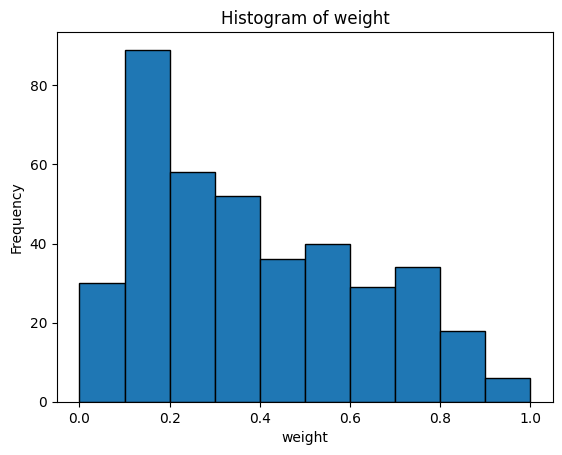

In [21]:
attribute = 'weight'

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

plt.hist(auto_df[attribute], bins=bins, edgecolor='black')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.title('Histogram of ' + attribute)
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

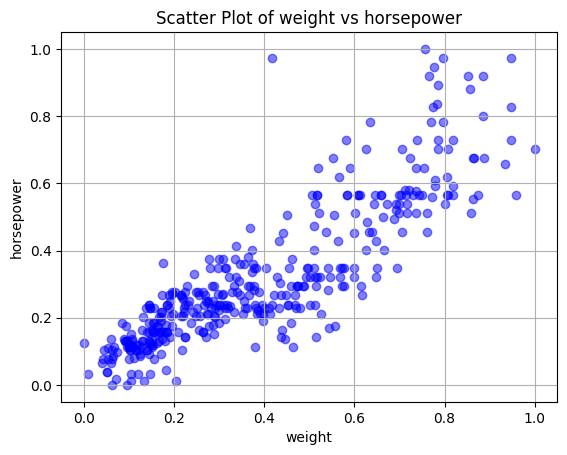

In [12]:
x_attribute = 'weight'
y_attribute = 'horsepower'

plt.scatter(auto_df[x_attribute], auto_df[y_attribute], color='blue', alpha=0.5)
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot of {x_attribute} vs {y_attribute}')
plt.grid(True)
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [20]:
attribute1 = 'weight'
attribute2 = 'horsepower'

x = auto_df[attribute1]
y = auto_df[attribute2]

pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman correlation coefficient: {spearman_corr}")

Pearson correlation coefficient: 0.8645377375741444
Spearman correlation coefficient: 0.878819325346196


6. Провести One Hot Encoding категоріального string атрибуту.

In [8]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(auto_df[['origin']])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])

result_df = pd.concat([auto_df, encoded_df], axis=1)

print("Original DataFrame:")
print(auto_df)
print("\nEncoded DataFrame:")
print(result_df)

Original DataFrame:
     displacement  cylinders  horsepower  weight  acceleration  model_year   
0           307.0          8       130.0    3504          12.0          70  \
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2

7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

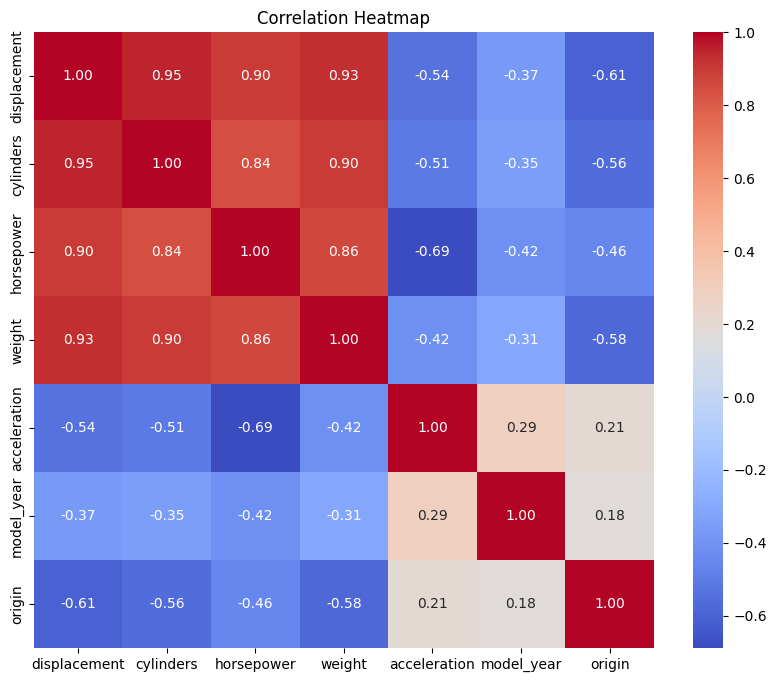

In [13]:
corr_matrix = auto_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()